In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.metrics import r2_score
import joblib

In [5]:
df=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/bigdatamart_rep/master/bigdatamart_Test.csv')
df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3
...,...,...,...,...,...,...,...,...,...,...,...
5676,FDB58,10.500,Regular,0.013496,Snack Foods,141.3154,OUT046,1997,Small,Tier 1,Supermarket Type1
5677,FDD47,7.600,Regular,0.142991,Starchy Foods,169.1448,OUT018,2009,Medium,Tier 3,Supermarket Type2
5678,NCO17,10.000,Low Fat,0.073529,Health and Hygiene,118.7440,OUT045,2002,NaN,Tier 2,Supermarket Type1
5679,FDJ26,15.300,Regular,0.000000,Canned,214.6218,OUT017,2007,NaN,Tier 2,Supermarket Type1


In [7]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [8]:
df.tail()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
5676,FDB58,10.5,Regular,0.013496,Snack Foods,141.3154,OUT046,1997,Small,Tier 1,Supermarket Type1
5677,FDD47,7.6,Regular,0.142991,Starchy Foods,169.1448,OUT018,2009,Medium,Tier 3,Supermarket Type2
5678,NCO17,10.0,Low Fat,0.073529,Health and Hygiene,118.7440,OUT045,2002,NaN,Tier 2,Supermarket Type1
5679,FDJ26,15.3,Regular,0.000000,Canned,214.6218,OUT017,2007,NaN,Tier 2,Supermarket Type1
5680,FDU37,9.5,Regular,0.104720,Canned,79.7960,OUT045,2002,NaN,Tier 2,Supermarket Type1


In [10]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year
count,4705.000000,5681.000000,5681.000000,5681.000000
mean,12.695633,0.065684,141.023273,1997.828903
std,4.664849,0.051252,61.809091,8.372256
min,4.555000,0.000000,31.990000,1985.000000
25%,8.645000,0.027047,94.412000,1987.000000
50%,12.500000,0.054154,141.415400,1999.000000
75%,16.700000,0.093463,186.026600,2004.000000
max,21.350000,0.323637,266.588400,2009.000000


In [14]:
df.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type'],
      dtype='object')

In [16]:
df.keys()

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type'],
      dtype='object')

In [19]:
df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
dtype: object

In [18]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [21]:
imp=SimpleImputer(strategy='mean')
df['Item_Weight']=imp.fit_transform(df['Item_Weight'].values.reshape(-1,1))

In [22]:
imp1=SimpleImputer(strategy='most_frequent')
df['Outlet_Size']=imp1.fit_transform(df['Outlet_Size'].values.reshape(-1,1))

In [23]:
df.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
dtype: int64

In [24]:
df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
dtype: object

In [26]:
le=LabelEncoder()
list=['Item_Identifier','Item_Fat_Content','Item_Type','Outlet_Identifier','Outlet_Size','Outlet_Location_Type','Outlet_Type']
for prisha in list:
    df[prisha]=le.fit_transform(df[prisha].astype(str))

In [27]:
df.dtypes

Item_Identifier                int32
Item_Weight                  float64
Item_Fat_Content               int32
Item_Visibility              float64
Item_Type                      int32
Item_MRP                     float64
Outlet_Identifier              int32
Outlet_Establishment_Year      int64
Outlet_Size                    int32
Outlet_Location_Type           int32
Outlet_Type                    int32
dtype: object

<AxesSubplot:>

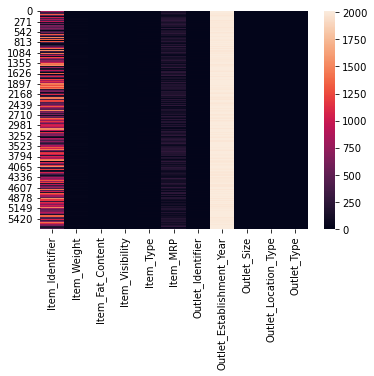

In [28]:
sns.heatmap(data=df)

In [29]:
dm_c=df.corr()
dm_c

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
Item_Identifier,1.000000,0.051221,-0.093344,-0.063856,-0.003236,0.007537,0.010162,0.011728,0.004379,-0.011657,-0.009553
Item_Weight,0.051221,1.000000,-0.042625,-0.016380,0.029657,0.045257,0.020081,0.013548,0.014735,-0.011356,0.005080
Item_Fat_Content,-0.093344,-0.042625,1.000000,0.033591,-0.128945,-0.014283,-0.000792,-0.010088,0.000421,-0.000130,0.000387
Item_Visibility,-0.063856,-0.016380,0.033591,1.000000,-0.036237,-0.014013,-0.114857,-0.097040,0.058082,-0.001146,-0.154042
Item_Type,-0.003236,0.029657,-0.128945,-0.036237,1.000000,0.060990,0.000333,0.000204,-0.003729,0.000584,0.006179
Item_MRP,0.007537,0.045257,-0.014283,-0.014013,0.060990,1.000000,-0.006412,-0.007233,-0.011717,0.001754,0.003326
Outlet_Identifier,0.010162,0.020081,-0.000792,-0.114857,0.000333,-0.006412,1.000000,0.079065,0.504545,-0.716113,0.099937
Outlet_Establishment_Year,0.011728,0.013548,-0.010088,-0.097040,0.000204,-0.007233,0.079065,1.000000,0.193397,-0.089496,-0.122841
Outlet_Size,0.004379,0.014735,0.000421,0.058082,-0.003729,-0.011717,0.504545,0.193397,1.000000,-0.614284,-0.201538
Outlet_Location_Type,-0.011657,-0.011356,-0.000130,-0.001146,0.000584,0.001754,-0.716113,-0.089496,-0.614284,1.000000,0.467299


<AxesSubplot:>

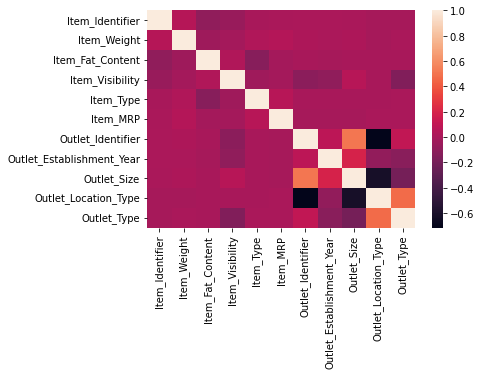

In [30]:
sns.heatmap(data=dm_c)

In [31]:
df.describe()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
count,5681.000000,5681.000000,5681.000000,5681.000000,5681.000000,5681.000000,5681.000000,5681.000000,5681.000000,5681.000000,5681.000000
mean,773.386376,12.695633,1.368773,0.065684,7.233410,141.023273,4.722760,1997.828903,1.170921,1.112832,1.201373
std,445.525926,4.245189,0.641085,0.051252,4.219057,61.809091,2.837201,8.372256,0.600328,0.812824,0.796740
min,0.000000,4.555000,0.000000,0.000000,0.000000,31.990000,0.000000,1985.000000,0.000000,0.000000,0.000000
25%,382.000000,9.195000,1.000000,0.027047,4.000000,94.412000,2.000000,1987.000000,1.000000,0.000000,1.000000
50%,771.000000,12.695633,1.000000,0.054154,6.000000,141.415400,5.000000,1999.000000,1.000000,1.000000,1.000000
75%,1160.000000,15.850000,2.000000,0.093463,10.000000,186.026600,7.000000,2004.000000,2.000000,2.000000,1.000000
max,1542.000000,21.350000,4.000000,0.323637,15.000000,266.588400,9.000000,2009.000000,2.000000,2.000000,3.000000


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            5681 non-null   int32  
 1   Item_Weight                5681 non-null   float64
 2   Item_Fat_Content           5681 non-null   int32  
 3   Item_Visibility            5681 non-null   float64
 4   Item_Type                  5681 non-null   int32  
 5   Item_MRP                   5681 non-null   float64
 6   Outlet_Identifier          5681 non-null   int32  
 7   Outlet_Establishment_Year  5681 non-null   int64  
 8   Outlet_Size                5681 non-null   int32  
 9   Outlet_Location_Type       5681 non-null   int32  
 10  Outlet_Type                5681 non-null   int32  
dtypes: float64(3), int32(7), int64(1)
memory usage: 333.0 KB


In [33]:
df.skew()

Item_Identifier             -0.000020
Item_Weight                  0.142813
Item_Fat_Content             0.999629
Item_Visibility              1.238312
Item_Type                    0.096486
Item_MRP                     0.136182
Outlet_Identifier           -0.060209
Outlet_Establishment_Year   -0.396306
Outlet_Size                 -0.087108
Outlet_Location_Type        -0.209049
Outlet_Type                  0.927446
dtype: float64

Item_Identifier                 AxesSubplot(0.125,0.536818;0.0824468x0.343182)
Item_Weight                  AxesSubplot(0.223936,0.536818;0.0824468x0.343182)
Item_Fat_Content             AxesSubplot(0.322872,0.536818;0.0824468x0.343182)
Item_Visibility              AxesSubplot(0.421809,0.536818;0.0824468x0.343182)
Item_Type                    AxesSubplot(0.520745,0.536818;0.0824468x0.343182)
Item_MRP                     AxesSubplot(0.619681,0.536818;0.0824468x0.343182)
Outlet_Identifier            AxesSubplot(0.718617,0.536818;0.0824468x0.343182)
Outlet_Establishment_Year    AxesSubplot(0.817553,0.536818;0.0824468x0.343182)
Outlet_Size                        AxesSubplot(0.125,0.125;0.0824468x0.343182)
Outlet_Location_Type            AxesSubplot(0.223936,0.125;0.0824468x0.343182)
Outlet_Type                     AxesSubplot(0.322872,0.125;0.0824468x0.343182)
dtype: object

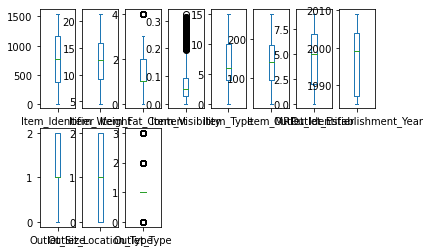

In [34]:
df.plot(kind='box',subplots=True,layout=(2,8))

<AxesSubplot:>

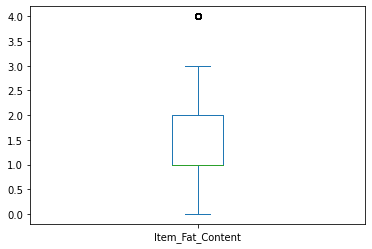

In [35]:
df['Item_Fat_Content'].plot.box()

<AxesSubplot:>

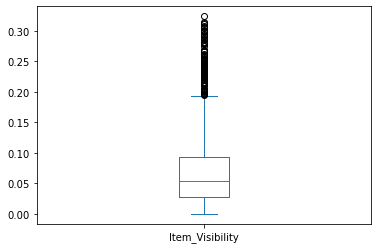

In [36]:
df['Item_Visibility'].plot.box()

<AxesSubplot:>

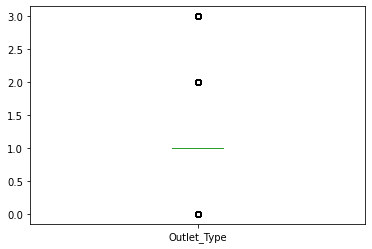

In [37]:
df['Outlet_Type'].plot.box()

In [40]:
from scipy.stats import zscore
z=np.abs(zscore(df))
threshold=3
print(np.where(z>3))

(array([   1,   46,   76,   78,   89,  103,  138,  242,  333,  369,  385,
        474,  499,  543,  595,  637,  739,  783,  797,  815,  858,  871,
        985,  996, 1025, 1037, 1046, 1105, 1143, 1191, 1256, 1256, 1270,
       1284, 1314, 1321, 1411, 1422, 1437, 1516, 1539, 1547, 1577, 1616,
       1710, 1757, 1780, 1812, 1823, 1853, 1857, 1915, 1919, 1927, 2019,
       2070, 2167, 2179, 2230, 2271, 2275, 2365, 2365, 2380, 2393, 2504,
       2516, 2561, 2595, 2605, 2609, 2625, 2628, 2677, 2779, 2798, 2836,
       2843, 2866, 2915, 2926, 3039, 3077, 3097, 3267, 3294, 3313, 3316,
       3346, 3357, 3362, 3378, 3461, 3502, 3565, 3622, 3638, 3679, 3744,
       3778, 3783, 3950, 3970, 4021, 4052, 4133, 4146, 4147, 4148, 4159,
       4208, 4232, 4255, 4328, 4330, 4334, 4340, 4352, 4365, 4421, 4478,
       4542, 4575, 4616, 4616, 4689, 4692, 4726, 4801, 4804, 4845, 4846,
       4870, 4919, 4921, 4941, 4965, 4970, 4976, 4999, 5121, 5132, 5154,
       5157, 5168, 5277, 5290, 5323, 5328, 5429, 5

In [41]:
dm_new=df[(z<3).all(axis=1)]
dm_new

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,1103,20.750000,1,0.007565,13,107.8622,9,1999,1,0,1
2,1406,14.600000,1,0.099575,11,241.7538,0,1998,1,2,0
3,809,7.315000,1,0.015388,13,155.0340,2,2007,1,1,1
4,1184,12.695633,2,0.118599,4,234.2300,5,1985,1,2,3
5,461,9.800000,2,0.063817,6,117.1492,8,1997,2,0,1
...,...,...,...,...,...,...,...,...,...,...,...
5676,231,10.500000,2,0.013496,13,141.3154,8,1997,2,0,1
5677,306,7.600000,2,0.142991,15,169.1448,3,2009,1,2,2
5678,1412,10.000000,1,0.073529,8,118.7440,7,2002,1,1,1
5679,517,15.300000,2,0.000000,3,214.6218,2,2007,1,1,1


Item_Identifier                 AxesSubplot(0.125,0.536818;0.0824468x0.343182)
Item_Weight                  AxesSubplot(0.223936,0.536818;0.0824468x0.343182)
Item_Fat_Content             AxesSubplot(0.322872,0.536818;0.0824468x0.343182)
Item_Visibility              AxesSubplot(0.421809,0.536818;0.0824468x0.343182)
Item_Type                    AxesSubplot(0.520745,0.536818;0.0824468x0.343182)
Item_MRP                     AxesSubplot(0.619681,0.536818;0.0824468x0.343182)
Outlet_Identifier            AxesSubplot(0.718617,0.536818;0.0824468x0.343182)
Outlet_Establishment_Year    AxesSubplot(0.817553,0.536818;0.0824468x0.343182)
Outlet_Size                        AxesSubplot(0.125,0.125;0.0824468x0.343182)
Outlet_Location_Type            AxesSubplot(0.223936,0.125;0.0824468x0.343182)
Outlet_Type                     AxesSubplot(0.322872,0.125;0.0824468x0.343182)
dtype: object

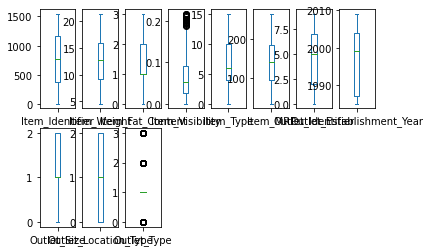

In [42]:
dm_new.plot(kind='box',subplots=True,layout=(2,8))

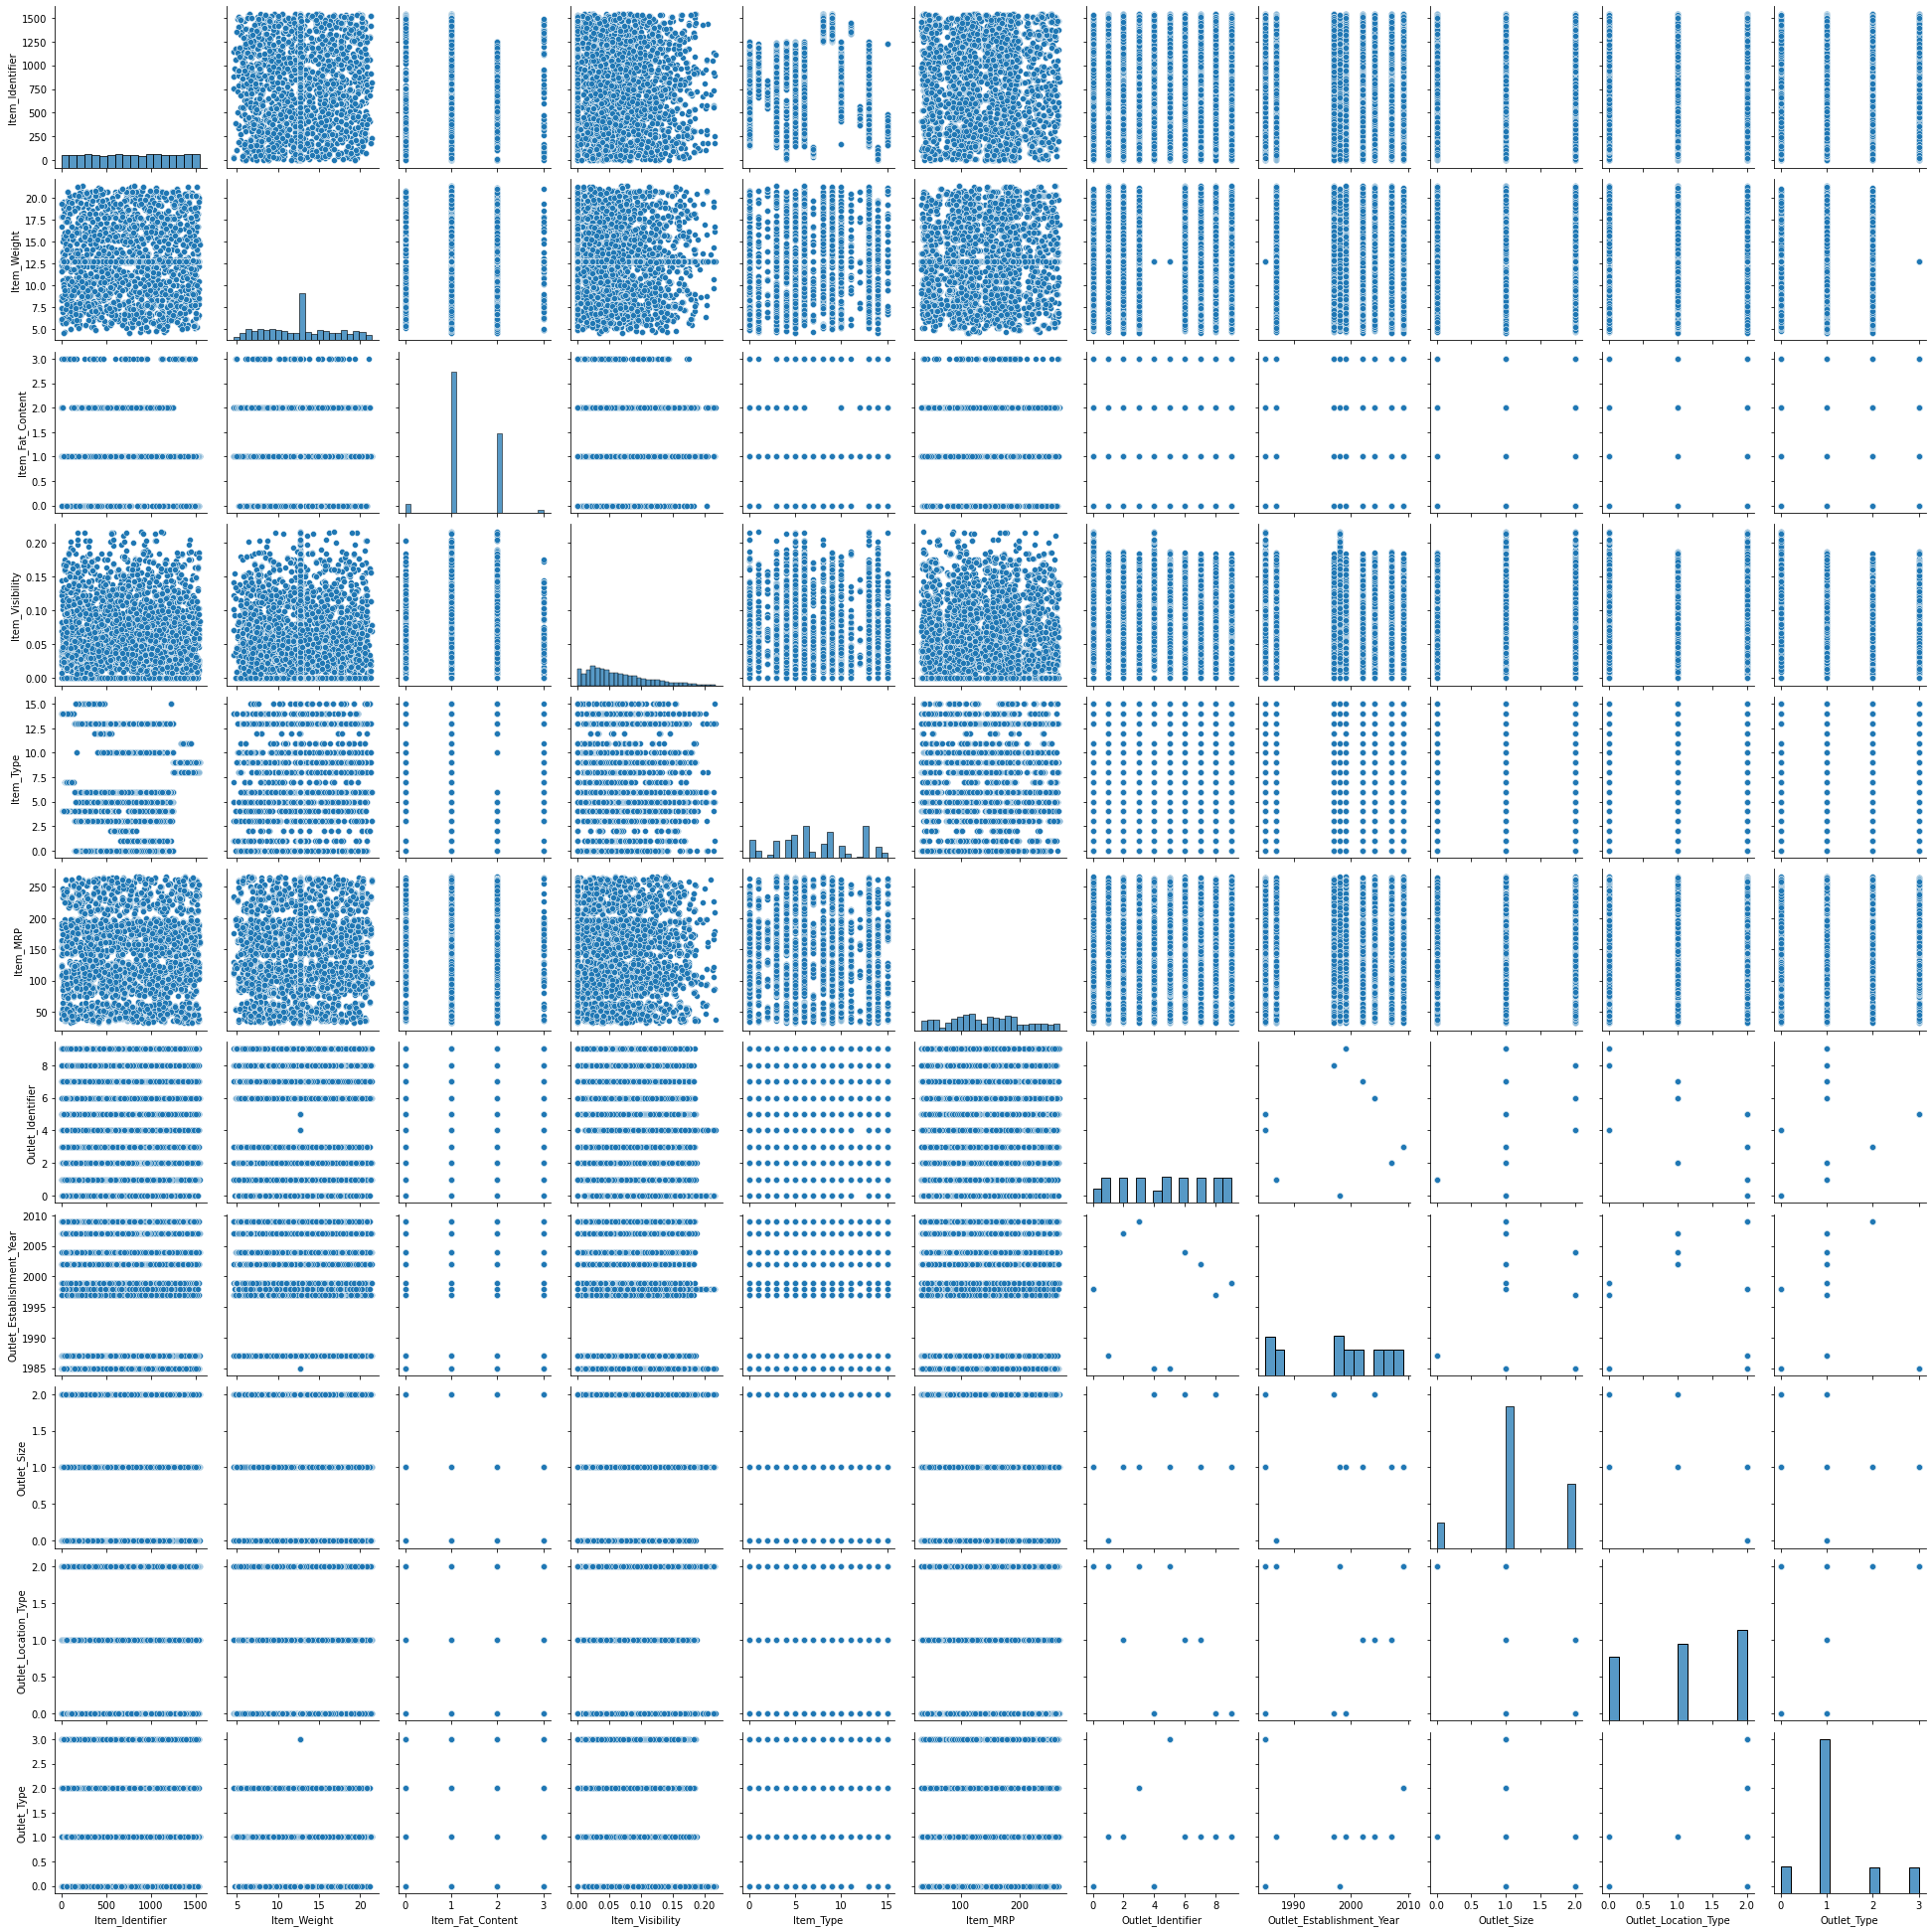

In [44]:
sns.pairplot(dm_new)

In [45]:
df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,1103,20.750000,1,0.007565,13,107.8622,9,1999,1,0,1
1,1067,8.300000,4,0.038428,4,87.3198,2,2007,1,1,1
2,1406,14.600000,1,0.099575,11,241.7538,0,1998,1,2,0
3,809,7.315000,1,0.015388,13,155.0340,2,2007,1,1,1
4,1184,12.695633,2,0.118599,4,234.2300,5,1985,1,2,3
...,...,...,...,...,...,...,...,...,...,...,...
5676,231,10.500000,2,0.013496,13,141.3154,8,1997,2,0,1
5677,306,7.600000,2,0.142991,15,169.1448,3,2009,1,2,2
5678,1412,10.000000,1,0.073529,8,118.7440,7,2002,1,1,1
5679,517,15.300000,2,0.000000,3,214.6218,2,2007,1,1,1


In [46]:
dm_new.skew()

Item_Identifier             -0.004227
Item_Weight                  0.139099
Item_Fat_Content             0.275609
Item_Visibility              0.786385
Item_Type                    0.087677
Item_MRP                     0.130290
Outlet_Identifier           -0.069567
Outlet_Establishment_Year   -0.413720
Outlet_Size                 -0.080824
Outlet_Location_Type        -0.214502
Outlet_Type                  0.949783
dtype: float64

In [47]:
for col in dm_new.columns:
    if dm_new.skew().loc[col]>0.55:
        dm_new[col]=np.log1p(dm_new[col])

In [48]:
dm_new.skew()

Item_Identifier             -0.004227
Item_Weight                  0.139099
Item_Fat_Content             0.275609
Item_Visibility              0.701178
Item_Type                    0.087677
Item_MRP                     0.130290
Outlet_Identifier           -0.069567
Outlet_Establishment_Year   -0.413720
Outlet_Size                 -0.080824
Outlet_Location_Type        -0.214502
Outlet_Type                 -0.221555
dtype: float64

In [49]:
x=dm_new.iloc[:,0:11]
x

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,1103,20.750000,1,0.007536,13,107.8622,9,1999,1,0,0.693147
2,1406,14.600000,1,0.094924,11,241.7538,0,1998,1,2,0.000000
3,809,7.315000,1,0.015271,13,155.0340,2,2007,1,1,0.693147
4,1184,12.695633,2,0.112077,4,234.2300,5,1985,1,2,1.386294
5,461,9.800000,2,0.061864,6,117.1492,8,1997,2,0,0.693147
...,...,...,...,...,...,...,...,...,...,...,...
5676,231,10.500000,2,0.013406,13,141.3154,8,1997,2,0,0.693147
5677,306,7.600000,2,0.133648,15,169.1448,3,2009,1,2,1.098612
5678,1412,10.000000,1,0.070951,8,118.7440,7,2002,1,1,0.693147
5679,517,15.300000,2,0.000000,3,214.6218,2,2007,1,1,0.693147


In [50]:
x.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type'],
      dtype='object')

In [51]:
y=dm_new.iloc[:,-1]
y

0       0.693147
2       0.000000
3       0.693147
4       1.386294
5       0.693147
          ...   
5676    0.693147
5677    1.098612
5678    0.693147
5679    0.693147
5680    0.693147
Name: Outlet_Type, Length: 5525, dtype: float64

In [52]:
y=pd.DataFrame(data=y)
y.columns

Index(['Outlet_Type'], dtype='object')

In [53]:
lm=LinearRegression()

In [54]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.22)

In [55]:
lm.fit(x_train,y_train)

LinearRegression()

In [56]:
lm.score(x_train,y_train)

1.0

In [57]:
pred=lm.predict(x_test)
pred

array([[0.69314718],
       [0.69314718],
       [0.69314718],
       ...,
       [0.69314718],
       [0.69314718],
       [1.38629436]])

In [58]:
print(r2_score(y_test,pred))

1.0
